In [1]:
import numpy as np
import sympy as sy
import matplotlib.cm as cm
import matplotlib.pylab as plt
from PIL import Image
import warnings
import time
import os

warnings.filterwarnings('ignore')  
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 20
plt.rcParams['legend.fontsize'] = 30
from IPython.display import display, Math

The **fourth-order Runge-Kutta** algorithm, **$\textbf{RK4}$**, has proven to be robust and capable of industrial strength work.                                 
The algorithm is based upon the formal integral of the differential equation:                                                          
$\qquad\begin{aligned} \frac{dx}{dt} &= f(t, x) \\  x(t) &= \int f(t, x) \ dt \\  x_{n+1} &= x_n + \int^{t_{n+1}}_{t_n} f(t, x) \ dt  \end{aligned}$

The critical idea here is to expand the integrand around the midpoint of the integration interval and thereby obtain  
$O(h^4)$ precision via the cancellation of the $h$ and $h^3$ terms .                                        
The price paid for the improved precision is having to approximate three derivatives and the unknown $x$ at the middle of the interval.


We will always use the **4th order Runge-Kutta method**, which in vector form is

$\quad\displaystyle\begin{equation} \mathbf{x}_{n+1} = \mathbf{x}_n + \frac{\mathbf{k}_1 + 2\mathbf{k}_2 + 2\mathbf{k}_3 + \mathbf{k}_4}{6} \end{equation}$

where                                                                                                                               
$\qquad\begin{aligned} \mathbf{k}_1 &=  \mathbf{f}(\mathbf{t}_n,\mathbf{x}_n) \ \mathrm{dt}  \\                              \mathbf{k}_2 &= \mathbf{f}\big(\mathbf{t}_n + \frac{\mathrm{dt}}{2},\mathbf{x}_n + \frac{\mathbf{k}_1}{2}\big) \ \mathrm{dt} \\ \mathbf{k}_3 &= \mathbf{f}\big(\mathbf{t}_n + \frac{\mathrm{dt}}{2},\mathbf{x}_n + \frac{\mathbf{k}_2}{2}\big) \  \mathrm{dt}  \\ \mathbf{k}_4 &= \mathbf{f}\big(\mathbf{t}_n + \mathrm{dt},\mathbf{x}_n + \mathbf{k}_3\big) \  \mathrm{dt}  \end{aligned}$

In [2]:
def RK4(f, t_span, dt, x0, ftype):
    t = np.arange(t_span[0], t_span[1]+dt, dt)
    x_n = np.zeros((len(t), len(x0)), dtype=ftype)
    x_n[0] = x0
    for i in range(len(t)-1):
        k1 = dt * f(t[i], x_n[i])
        k2 = dt * f(t[i] + 0.5*dt, x_n[i] + 0.5*k1)
        k3 = dt * f(t[i] + 0.5*dt, x_n[i] + 0.5*k2)
        k4 = dt * f(t[i] + dt, x_n[i] + k3)
        x_n[i+1] = x_n[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
        
    return t, x_n

# $$\textit{Hénon-Heiles}$$


<span style="color:red">Show that the Hénon–Heiles Hamiltonian (11.17)                                                                                           
<span style="color:red">$ \qquad\displaystyle H = \frac{1}{2m}(p_x^2 + p_y^2) + \frac{1}{2}k(x^2 + y^2) + \lambda(x^2 y - \frac{1}{3}y^3). $                                         
<span style="color:red">can be written in polar coordinates as                                                                                                   
<span style="color:red"> $ \qquad\displaystyle H = \frac{p^2_r}{2m} + \frac{p^2_{\theta}}{2mr^2} + \frac{1}{2}kr^2 + \frac{1}{3} \lambda r^3 \sin 3\theta. $

<span style="color:red">This form explicitly exhibits the threefold symmetry.

We start from the **original Hénon–Heiles Hamiltonian in Cartesian coordinates**, usually given by:

 $ \qquad\displaystyle \mathcal{H} = \frac{1}{2m}(p_x^2 + p_y^2) + \frac{1}{2}k(x^2 + y^2) + \lambda(x^2 y - \frac{1}{3}y^3). $

We use the standard polar coordinate substitutions:

* $x = r \cos\theta$
* $y = r \sin\theta$
* $p_x = m\dot{x}$, $p_y = m\dot{y}$

From this, using the chain rule:

* $\dot{x} = \dot{r} \cos\theta - r \dot{\theta} \sin\theta$
* $\dot{y} = \dot{r} \sin\theta + r \dot{\theta} \cos\theta$

Thus, the **kinetic energy** becomes:

$\qquad\displaystyle \begin{aligned} T &= \frac{1}{2}m(\dot{x}^2 + \dot{y}^2)  \\
 &= \frac{1}{2}m \left[ (\dot{r} \cos\theta - r \dot{\theta} \sin\theta)^2 + (\dot{r} \sin\theta + r \dot{\theta} \cos\theta)^2 \right] \\
 &= \frac{1}{2}m \left[ \dot{r}^2 \cos^2\theta + r^2 \dot{\theta}^2 \sin^2\theta - 2r\dot{r}\dot{\theta}\cos\theta\sin\theta + \dot{r}^2 \sin^2\theta + r^2 \dot{\theta}^2 \cos^2\theta + 2r\dot{r}\dot{\theta}\cos\theta\sin\theta \right] \\
 &= \frac{1}{2}m \left[ \dot{r}^2 \cos^2\theta + \dot{r}^2 \sin^2\theta + r^2 \dot{\theta}^2 \sin^2\theta + r^2 \dot{\theta}^2 \cos^2\theta - 2r\dot{r}\dot{\theta}\cos\theta\sin\theta + 2r\dot{r}\dot{\theta}\cos\theta\sin\theta \right] \qquad[\because \ \text{re-arranging the eqn. } ] \\
 &= \frac{1}{2}m \left[ \dot{r}^2 \left( \cos^2\theta +  \sin^2\theta \right) + r^2 \dot{\theta}^2\left( \sin^2\theta + \cos^2\theta \right) \right] \\
 &= \frac{1}{2}m(\dot{r}^2 + r^2 \dot{\theta}^2) \qquad[\because \ \text{ Trigonometric identity }, \ \  \cos^2\theta +  \sin^2\theta =1] \\
 &= \frac{1}{2}(m\dot{r}^2 + mr^2 \dot{\theta}^2) \\
 &= \frac{m^2\dot{r}^2}{2m} + \frac{m^2(r^2)^2 \dot{\theta}^2}{2mr^2} \\
 &= \frac{(m\dot{r})^2}{2m} + \frac{(mr^2 \dot{\theta})^2}{2mr^2} \\
 &= \frac{p_r^2}{2m} + \frac{p_\theta^2}{2mr^2} \qquad[\because \ \text{conjugate momenta }, \ p_r = m \dot{r}, \ p_\theta = m r^2 \dot{\theta} \ ]
 \end{aligned}$


The potential energy in the Hénon–Heiles system is:

 $ \qquad\displaystyle \begin{aligned}
 V(x, y) &= \frac{1}{2}k(x^2 + y^2) + \lambda \left(x^2 y - \frac{1}{3}y^3 \right) \\
 V(r, \theta) &= \frac{1}{2}k\left[ (r \cos\theta)^2 + (r \sin\theta)^2)\right] + \lambda \left[(r \cos\theta)^2 \times (r \sin\theta) - \frac{1}{3}(r \sin\theta)^3 \right] \\
 &= \frac{1}{2}k(r^2\cos^2\theta + r^2\sin^2\theta) + \lambda \left( r^2\cos^2\theta \times r \sin\theta - \frac{1}{3} r^3 \sin^3\theta \right) \\
&= \frac{1}{2}k r^2(\cos^2\theta + \sin^2\theta) + \lambda \left( r^3 \cos^2\theta \sin\theta - \frac{1}{3} r^3 \sin^3\theta \right) \\
&= \frac{1}{2}k r^2 + \lambda r^3 \left( \cos^2\theta \sin\theta - \frac{1}{3} \sin^3\theta \right) \qquad[\because \ \cos^2\theta + \sin^2\theta=1] \\
&= \frac{1}{2}k r^2 + \lambda r^3 \sin\theta \left( \cos^2\theta  - \frac{1}{3} \sin^2\theta \right)\qquad [\because \ \text{ taking }\sin^2\theta \text{ common}] \\
&= \frac{1}{2}k r^2 + \lambda r^3 \sin\theta \left( 1 - \sin^2\theta  - \frac{1}{3} \sin^2\theta \right)\qquad[\because \ \cos^2\theta=1-\sin^2\theta] \\
&= \frac{1}{2}k r^2 + \lambda r^3 \sin\theta \left( 1 - \frac{4}{3} \sin^2\theta \right) \\
&= \frac{1}{2}k r^2 + \left\{\lambda r^3 \frac{1}{3}\times 3 \left( \sin\theta - \frac{4}{3} \sin^3\theta \right)\right\} \qquad [\because \  \text{Multiplying and Dividing by }3]\\
&= \frac{1}{2}k r^2 + \frac{1}{3}\lambda r^3 \left( 3\sin\theta - 4\sin^3\theta \right) \\
&= \frac{1}{2}k r^2 + \frac{1}{3} \lambda r^3 \sin(3\theta) \qquad[\because \ \text{ Trigonometric identity }, \ \ \sin(3\theta)= 3\sin\theta - 4\sin^3\theta].
\end{aligned} $

**Hence:**

 $ \qquad\displaystyle T = \frac{p_r^2}{2m} + \frac{p_\theta^2}{2mr^2} $

 $ \qquad\displaystyle V = \frac{1}{2}k r^2 + \frac{1}{3} \lambda r^3 \sin(3\theta) $


 $ \qquad\displaystyle \mathcal{H} = T + V = \frac{p_r^2}{2m} + \frac{p_\theta^2}{2mr^2} + \frac{1}{2}kr^2 + \frac{1}{3} \lambda r^3 \sin 3\theta $
 
 $ \qquad\displaystyle \boxed{ \mathcal{H} = \frac{p_r^2}{2m} + \frac{p_\theta^2}{2mr^2} + \frac{1}{2}kr^2 + \frac{1}{3} \lambda r^3 \sin 3\theta} $

This form clearly shows the **threefold symmetry** due to the $\sin(3\theta)$ term, which is periodic under $ \displaystyle \theta \to \theta + \frac{2\pi}{3}$.


<span style="color:red">Show that for the energy $\displaystyle E = \frac{1}{6} ,$ the bounding equipotential $\displaystyle \left(V(r, \theta) = \frac{1}{6}\right)$ for the dimensionless Hénon–Heiles potential

<span style="color:red"> $ \qquad\displaystyle V(r, \theta) = \frac{1}{2}r^2 + \frac{1}{3}r^3 \sin 3\theta, $
 
<span style="color:red">forms an equilateral triangle in the $x, y$ plane (cf. Fig. 11.6).

According to question :

 $ \qquad\displaystyle\frac{1}{2}r^2 + \frac{1}{3}r^3 \sin 3\theta = \frac{1}{6} $

Multiply both sides by 6 to simplify:

 $ \qquad\displaystyle 3r^2 + 2r^3 \sin 3\theta = 1 \tag{1} $


##### Step 2: Analyze the symmetry

   Note:
    The potential depends on $\sin 3\theta$, which has **period $2\pi/3$**.
    This means the equipotential curves repeat every $120^\circ$, so the potential has **threefold rotational symmetry**.

##### Step 3: Find maximum and minimum values of $r$

We analyze the extrema of $r$ by looking at the extreme values of $\sin 3\theta$:

###### Case 1: $\sin 3\theta = -1$

Then (1) becomes:

 $ \qquad\displaystyle 3r^2 - 2r^3 = 1 \Rightarrow 2r^3 - 3r^2 + 1 = 0 \tag{2} $

Solve (2):

Factor:

 $ \qquad\displaystyle 2r^3 - 3r^2 + 1 = (r - 1)^2(2r + 1)\Rightarrow r = 1\ (\text{double root}),\quad r = -\frac{1}{2}$

We take **positive solution**: $r_{\text{max}} = 1$

Occurs at:

 $ \qquad\displaystyle \sin 3\theta = -1 \Rightarrow 3\theta = \frac{3\pi}{2} + 2\pi n \Rightarrow \theta = \frac{\pi}{2}, \frac{7\pi}{6}, \frac{11\pi}{6} $

=> That is, angles:

 $ \qquad\displaystyle \theta = {90}^{\circ},\ {210}^{\circ},\ {330}^{\circ} $

These are spaced $120^\circ$ apart ⇒ triangle corners.

###### Case 2: $\sin 3\theta = +1$

Then (1) becomes:

  $ \qquad\displaystyle 3r^2 + 2r^3 = 1 \Rightarrow 2r^3 + 3r^2 - 1 = 0 $

This is a cubic equation. Solve numerically or plot. Real solution ≈ $r_{\text{min}} = \frac{1}{2}$

So:

* The radial distance $r$ is **maximum (1)** at 3 points: $\theta = 90^\circ,\ 210^\circ,\ 330^\circ$
* It is **minimum (\~0.5)** at angles between those, where $\sin 3\theta = +1$

In polar coordinates, when the **radius peaks sharply at 3 evenly spaced angles**, and is minimized in between, the shape traced is:

* A closed curve
* With threefold symmetry
* With **3 sharp corners** where $r = 1$
* Rounded inward elsewhere where $r \approx 0.5$

This is the shape of an **equilateral triangle** in polar coordinates.

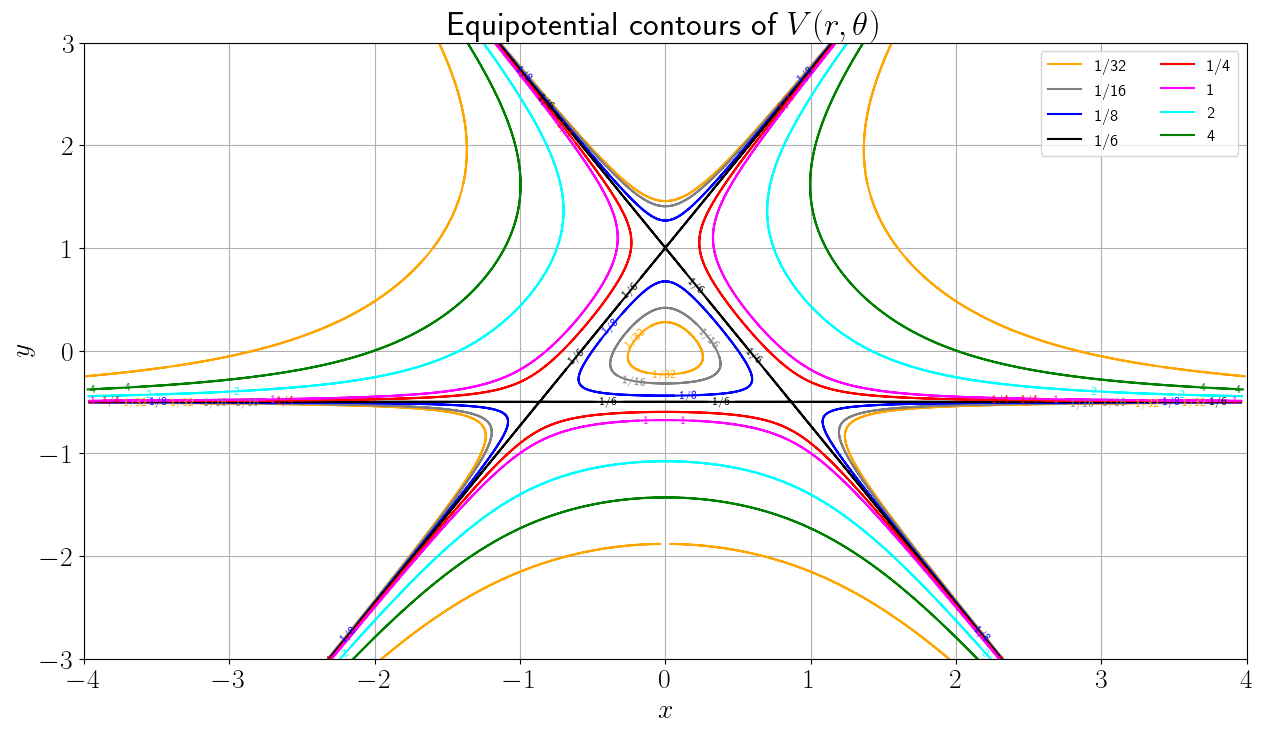

In [3]:
def V(r, theta):
    return (1/2) * r**2 + (1/3) * r**3 * np.sin(3 * theta) 
    
r        = np.linspace(-4, 4, 400)
theta    = np.linspace(0, 2 * np.pi, 400)
R, Theta = np.meshgrid(r, theta)
X        = R * np.cos(Theta)
Y        = R * np.sin(Theta)
Z        = V(R, Theta)
levels   = [ 1/32, 1/16, 1/8, 1/6, 1/4, 1/3, 1, 2, 4]
colors   = [ 'orange', 'grey', 'blue', 'black', 'red', 'magenta', 'cyan', 'green']
labels   = ['1/32', '1/16', '1/8', '1/6', '1/4', '1', '2', '4']
fig      = plt.figure(figsize=(15, 8))
cs       = plt.contour(X, Y, Z, levels=levels, colors=colors)
plt.clabel(cs, inline=True, fontsize=8, fmt={level: label for level, label in zip(levels, labels)})
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.ylim(-3,3)
plt.title("Equipotential contours of $V(r, \\theta)$")
plt.grid(True)
plt.legend([plt.Line2D([0], [0], color=color) for color in colors], labels, fontsize=12,loc='upper right', ncol=2)
plt.show()

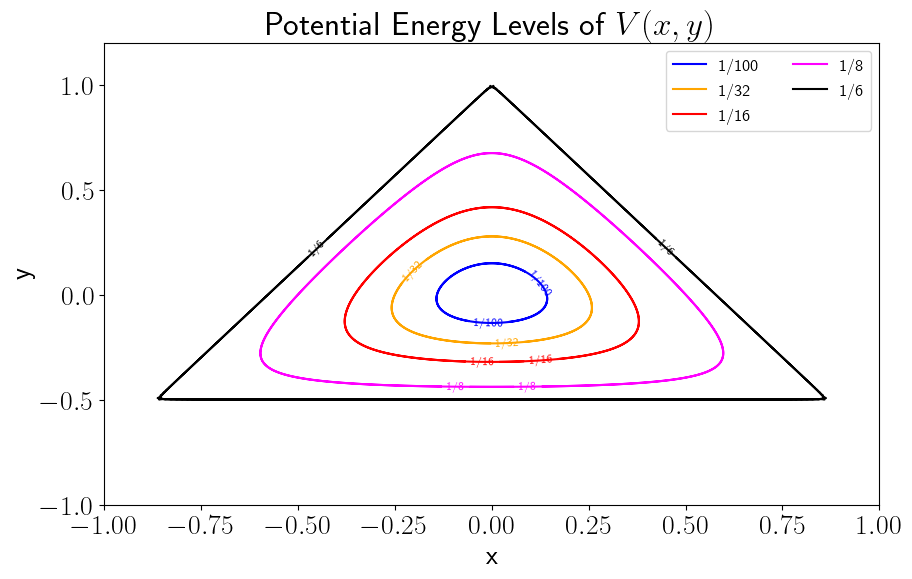

In [31]:
def V(r, theta):
    return (1/2) * r**2 + (1/3) * r**3 * np.sin(3 * theta) 
    
r        = np.linspace(-1, 1, 400)
theta    = np.linspace(0, 2 * np.pi, 400)
R, Theta = np.meshgrid(r, theta)
X        = R * np.cos(Theta)
Y        = R * np.sin(Theta)
Z        = V(R, Theta)
levels   = [ 1/100, 1/32, 1/16, 1/8, 1/6]
colors   = [ 'blue', 'orange', 'red', 'magenta', 'black']
labels   = [ '1/100', '1/32', '1/16', '1/8', '1/6']
plt.figure(figsize=(10,6))
contours = plt.contour(X, Y, Z, levels=levels, colors=colors)
plt.clabel(contours, inline=True, fontsize=8, fmt={level: label for level, label in zip(levels, labels)})
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-1, 1.2)
plt.title('Potential Energy Levels of $V(x, y)$')
plt.legend([plt.Line2D([0], [0], color=color) for color in colors], labels, fontsize=12,loc='upper right', ncol=2)
plt.show()

#### <span style="color:red">Hénon-Heiles Hamiltonian $(H)$ system (which may be used as a simple model of the motion of a star inside a galaxy) given by                                                                             
$ \qquad\qquad\begin{aligned} T &= \frac{1}{2} m^2\big( \dot{x}^2+\dot{y}^2 \big) = \frac{1}{2} \big( p_x^2+p_y^2 \big) \\ V &= \frac{1}{2}( x^2+y^2)+x^2y- \frac{1}{3}y^3 \\ \mathcal{H} &=T+V=\frac{1}{2} \big( p_x^2+p_y^2+x^2+y^2 \big) + x^2y-\frac{1}{3}y^3  \\  \dot{x} &=\frac{dx}{dt}=\frac{\partial H}{\partial p_x}=p_x \\ \ddot{x} & =\dot{p_x}=\frac{dp_x}{dt}=-\frac{\partial H}{\partial x}=-\frac{\partial V}{\partial x}=-x-2xy \\ \dot{y} &=\frac{dy}{dt}=\frac{\partial H}{\partial p_y}=p_y \\ \ddot{y} &=\dot{p_y}=\frac{dp_y}{dt}=-\frac{\partial H}{\partial y}=-\frac{\partial V}{\partial y}=-y-x^2+y^2  \end{aligned}$

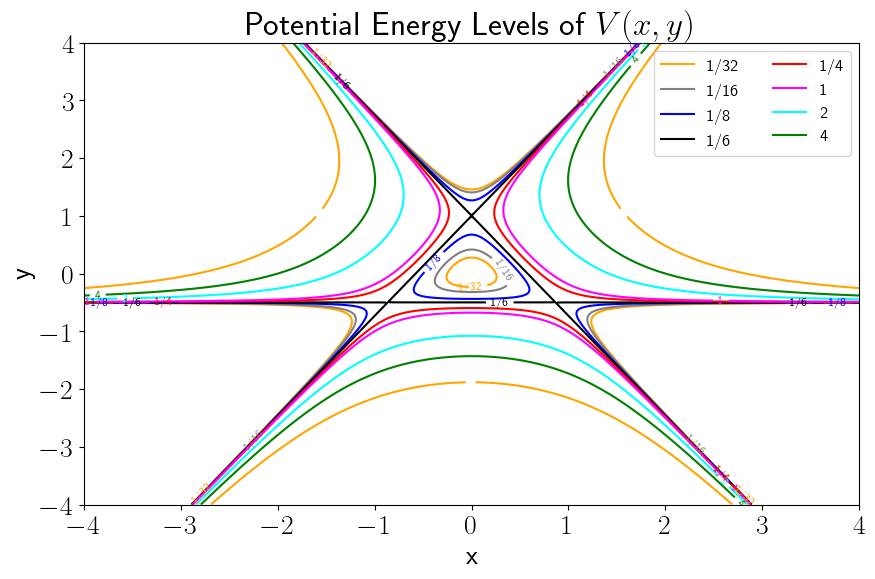

In [4]:
def V(x, y):
    return (1/2)*(x**2 + y**2) + x**2*y - y**3/3

x = np.linspace(-4,4, 400)
y = np.linspace(-4,4, 400)
X, Y = np.meshgrid(x, y)
Z = V(X, Y)

levels = [ 1/32, 1/16, 1/8, 1/6, 1/4, 1/3, 1, 2, 4]
colors = [ 'orange', 'grey', 'blue', 'black', 'red', 'magenta', 'cyan', 'green']
labels = ['1/32', '1/16', '1/8', '1/6', '1/4', '1', '2', '4']

plt.figure(figsize=(10,6))
contours = plt.contour(X, Y, Z, levels=levels, colors=colors)
plt.clabel(contours, inline=True, fontsize=8, fmt={level: label for level, label in zip(levels, labels)})
plt.xlabel('x')
plt.ylabel('y')
plt.title('Potential Energy Levels of $V(x, y)$')
plt.legend([plt.Line2D([0], [0], color=color) for color in colors], labels, fontsize=12,loc='upper right', ncol=2)
plt.show()

In [5]:
def henon_heilies(t, X0):
    x, px, y, py = X0
    dx_dt  = px
    dpx_dt = -x - 2*x*y
    dy_dt  = py
    dpy_dt = - y - (x**2 - y**2)
    return np.array([dx_dt, dpx_dt, dy_dt, dpy_dt])

$ \qquad\displaystyle \mathcal{H} = \frac{1}{2m}(p_x^2 + p_y^2) + \frac{1}{2}k(x^2 + y^2) + \lambda(x^2 y - \frac{1}{3}y^3). $                                          
Hénon and Heiles set $p_x = m\dot{x}$ and $p_y = m\dot{y}$,                                                                                            
expressed the Hamiltonian in normalized form using dimensionless units,                                                                                     
and set it equal to a dimensionless energy $E$, with $\lambda=1$  and $k=1$                                 
$ \qquad \begin{aligned}  E &= \frac{1}{2}\dot{x}^2 +  \frac{1}{2}\dot{y}^2 + \frac{1}{2}{x}^2 + \frac{1}{2}{y}^2 + x^2y - \frac{1}{3}y^3  \\
 2E &= \dot{x}^2 +   \dot{y}^2 +  {x}^2 +  {y}^2 + 2x^2y - \frac{2}{3}y^3 \end{aligned}$                                                                    
The initial velocity, $\dot{x}$, is fixed by Eq. (11.19) with $x = 0$                                                                                    
$ \qquad \begin{aligned}\dot{x}^2 &= 2E - \dot{y}^2 - {y}^2 + \frac{2}{3}y^3 \\ \dot{x} &= \sqrt{2E - \dot{y}^2 - {y}^2 + \frac{2}{3}y^3 } \end{aligned}$      


In [6]:
def trajectory(E, x0, y0, py0, t_span, dt, ftype):
    px0 = (2*E - y0**2 - py0**2 + (2/3)*y0**3)**0.5
    X0  = [x0, px0, y0, py0]
    t, traj = RK4(henon_heilies, t_span, dt, X0, ftype)
    return t, traj

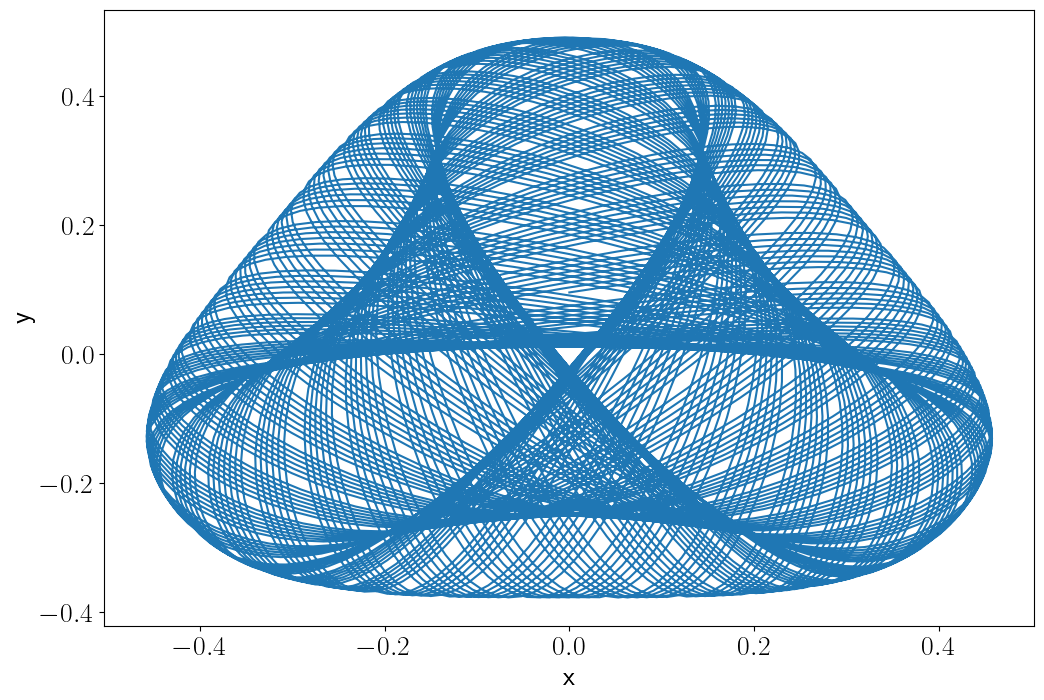

In [7]:
E       = 0.1
x0      = 0.0
y0      = 0.095
py0     = 0.096
t_span  = (0, 800)
dt      = 0.1
t, traj = trajectory(E, x0, y0, py0, t_span, dt, float)
xL, pxL, yL, pyL = traj[:,0], traj[:,1], traj[:,2], traj[:,3]

plt.figure(figsize=(12,8))
plt.plot(xL, yL, '-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

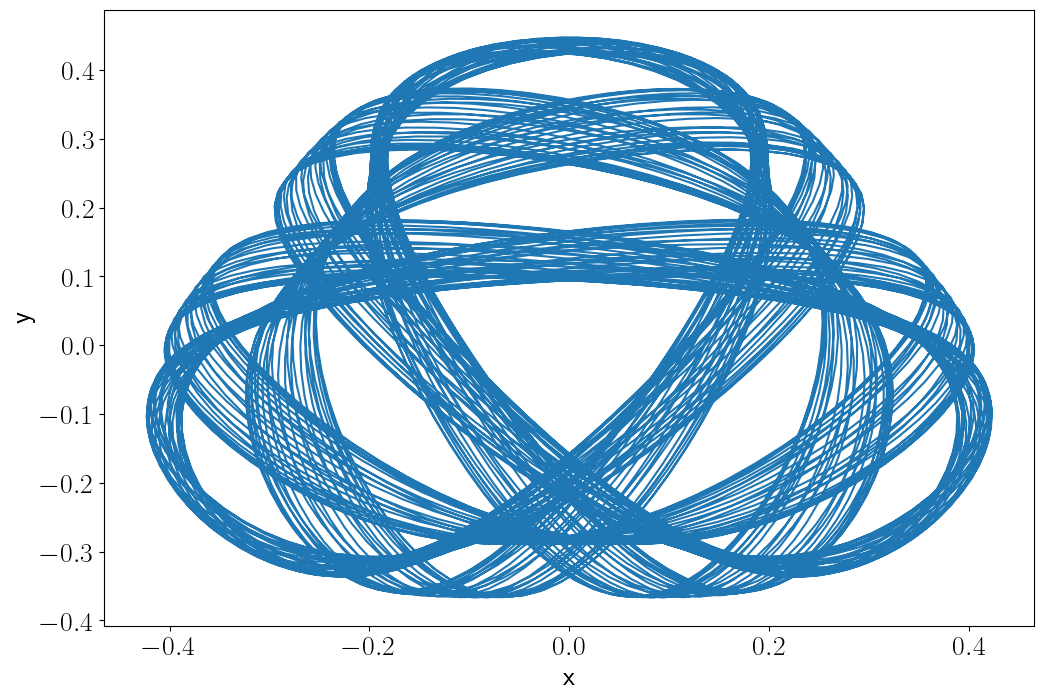

In [8]:
E       = 0.1
x0      = 0.0
y0      = 0.095
py0     = 0.03
t_span  = (0, 800)
dt      = 0.1
t, traj = trajectory(E, x0, y0, py0, t_span, dt, float)
xL, pxL, yL, pyL = traj[:,0], traj[:,1], traj[:,2], traj[:,3]

plt.figure(figsize=(12,8))
plt.plot(xL, yL, '-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

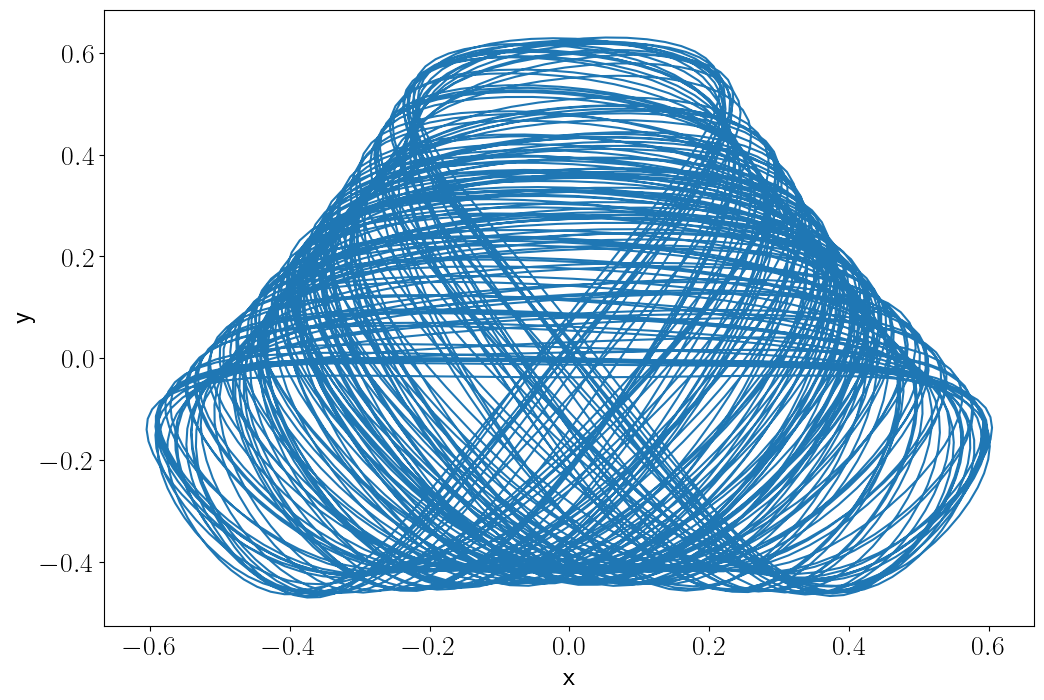

In [9]:
E       = 1/6
x0      = 0.0
y0      = 0.01
py0     = 0.02
t_span  = (0, 800)
dt      = 0.1
t, traj = trajectory(E, x0, y0, py0, t_span, dt, float)
xL, pxL, yL, pyL = traj[:,0], traj[:,1], traj[:,2], traj[:,3]

plt.figure(figsize=(12,8))
plt.plot(xL, yL, '-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We examine Poincare sections in the $\dot{y}, y$ plane located at $x = 0$.                                                                                
$ \qquad\displaystyle E = \frac{1}{2}\dot{x}^2 +  \frac{1}{2}\dot{y}^2 + \frac{1}{2}{x}^2 + \frac{1}{2}{y}^2 + x^2y - \frac{1}{3}y^3 $                       
The accessible region in such a section lies within the limits set by letting $x = 0$ and $\dot{x} = 0$ in above eqn.                                       
$ \qquad\displaystyle  \frac{1}{2}\dot{y}^2 +  \frac{1}{2}{y}^2 - \frac{1}{3}y^3 = E$                                                                           
The maximum velocity $\dot{y}$ occurs at $y = 0$, and the extrema of the coordinate $y$ are found by solving the cubic equation (11.23) with $\dot{y}$ set equal to zero.

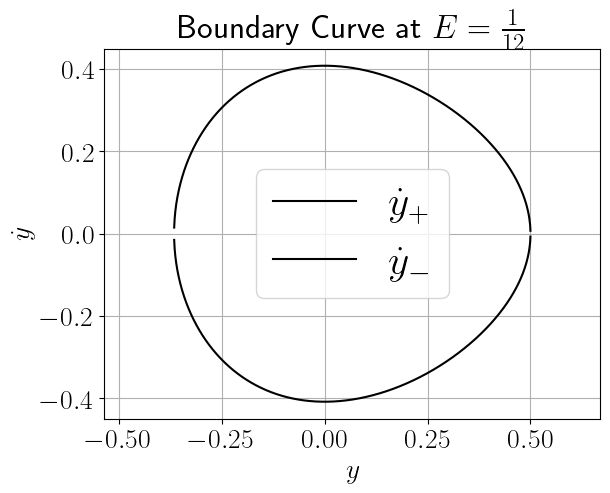

In [10]:
E = 1/12
y_vals = np.linspace(-0.5, 0.6, 2001)
dy_vals = []

for y in y_vals:
    val = 2*(E - 0.5*y**2 + (1/3)*y**3)
    dy = np.sqrt(val) if val >= 0 else np.nan
    dy_vals.append(dy)

dy_vals = np.array(dy_vals)

plt.plot(y_vals, dy_vals, 'k', label=r'$\dot{y}_+$')
plt.plot(y_vals, -dy_vals, 'k', label=r'$\dot{y}_-$')
plt.xlabel('$y$')
plt.ylabel(r'$\dot{y}$')
plt.title(r'Boundary Curve at $E = \frac{1}{12}$')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()

<span style="color:red">Construct a **Poincaré section** for the **Hénon–Heiles potential**.                                                                                      
It is suggested that you make the plot in the $\dot{y} - y$ plane so that you can compare your results with Figs. 11.7 and 11.8.                                
Choose an energy $E$, and initial conditions $x = 0$ and $\dot{x} = 0$, and initial conditions on $y$ and $\dot{y}$ to satisfy the **energy condition** and determine the **boundary curve**.                                                                                                                            
Relax the condition on $\dot{x}$, and choose conditions on $\dot{x}, y, \dot{y}$ that satisfy the energy condition for $x = 0$.                       
Integrate the equations of motion to find the **crossings**.

<span style="color:red">(a) Choose  $\displaystyle E = \frac{1}{12}, y_0 = 0.01, \dot{y}_0 = 0.02, x_0 = 0$                                                                                            
Use the energy conservation equation $E$ to determine $x_0$      
 Integrate the equations of motion and find all times $t$ where $x(t) \approx 0$.
Save the values:
 $ \displaystyle \  t,\quad x(t)\approx 0,\quad \dot{x}(t),\quad y(t),\quad \dot{y}(t)$                                                                    
 Find the **first 27 crossings** and plot the section in the $\dot{y}, y$ plane.
 Compare the result with **Figure 11.7**.

<span style="color:red">(b) Repeat the above process for $\displaystyle E = \frac{1}{8}$ and plot the chaotic behavior.

In [11]:
def compute_poincare_section(E, y0, dy0, t_max=1000, dt=0.01, max_crossings=27):
    dx0_sq = 2 * E - dy0**2 - y0**2 + (2/3) * y0**3
    if dx0_sq < 0:
        raise ValueError("Initial conditions violate energy constraint.")
    dx0 = np.sqrt(dx0_sq)
    x0 = 0.0
    state0 = np.array([x0, dx0, y0, dy0])
    t, trajectory = RK4(henon_heilies, [0, t_max], dt, state0, float)
    poincare_y    = []
    poincare_dy   = []
    crossings     = 0
    for i in range(1, len(t)):
        x_prev  = trajectory[i-1, 0]
        x_now   = trajectory[i, 0]
        dx_prev = trajectory[i-1, 1]
        if x_prev * x_now < 0 and dx_prev > 0:
            r        = -x_prev / (x_now - x_prev)
            y_cross  = trajectory[i-1, 2] + r * (trajectory[i, 2] - trajectory[i-1, 2])
            dy_cross = trajectory[i-1, 3] + r * (trajectory[i, 3] - trajectory[i-1, 3])
            poincare_y.append(y_cross)
            poincare_dy.append(dy_cross)
            crossings += 1
            if crossings >= max_crossings:
                break                    
    return np.array(poincare_y), np.array(poincare_dy)

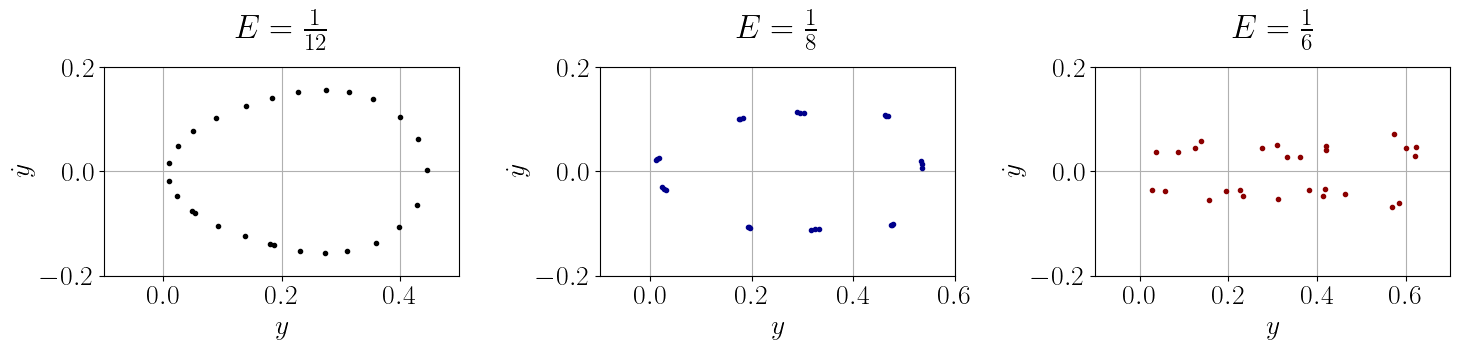

In [12]:
energie = [1/12, 1/8, 1/6]
labels  = [r'$E = \frac{1}{12}$', r' $E = \frac{1}{8}$', r' $E = \frac{1}{6}$']
colors  = ['black', 'darkblue', 'darkred']
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
for i, E in enumerate(energie):
    y_vals, dy_vals = compute_poincare_section(E=E, y0=0.01, dy0=0.02, t_max=1000, dt=0.01, max_crossings=27)
    ax[i].plot(y_vals, dy_vals, 'o', color=colors[i], markersize=3)
    ax[i].set_xlabel(r'$y$')
    ax[i].set_ylabel(r'$\dot{y}$')
    ax[i].set_title(labels[i], y=1.1)
    ax[i].grid(True)
    ax[i].set_xlim(-0.1, 0.5+0.1*i)
    ax[i].set_ylim(-0.2, 0.2)
plt.tight_layout()
plt.show()

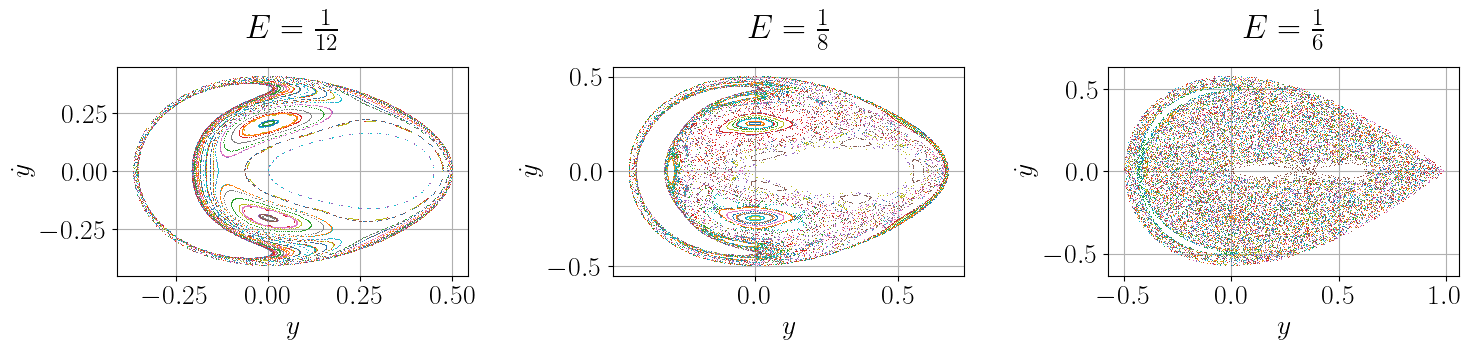

In [13]:
energie = [1/12, 1/8, 1/6]
labels  = [r' $E = \frac{1}{12}$', r' $E = \frac{1}{8}$', r' $E = \frac{1}{6}$']
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
for i, E in enumerate(energie):
    y_vals = np.linspace(-0.6, 0.8, 75)
    dy_pos = []
    for y in y_vals:
        val = 2 * (E - 0.5*y**2 + (1/3)*y**3)
        if val >= 0:
            dy_pos.append(np.sqrt(val)) 

    dy_all = dy_pos + [-dy for dy in dy_pos]

    for py0 in dy_all:
        try:
            y_cross, dy_cross = compute_poincare_section(E=E, y0=0.01, dy0=py0, t_max=1000, dt=0.01, max_crossings=27000)
            ax[i].plot(y_cross, dy_cross, ',', markersize=2)
        except ValueError:
            continue  # skip invalid initial conditions

    ax[i].set_xlabel(r'$y$')
    ax[i].set_ylabel(r'$\dot{y}$')
    ax[i].set_title(labels[i], y=1.1)
    ax[i].grid(True)
    #ax[i].set_xlim(-1, 1)
    #ax[i].set_ylim(-1, 1)
plt.tight_layout()
plt.show()

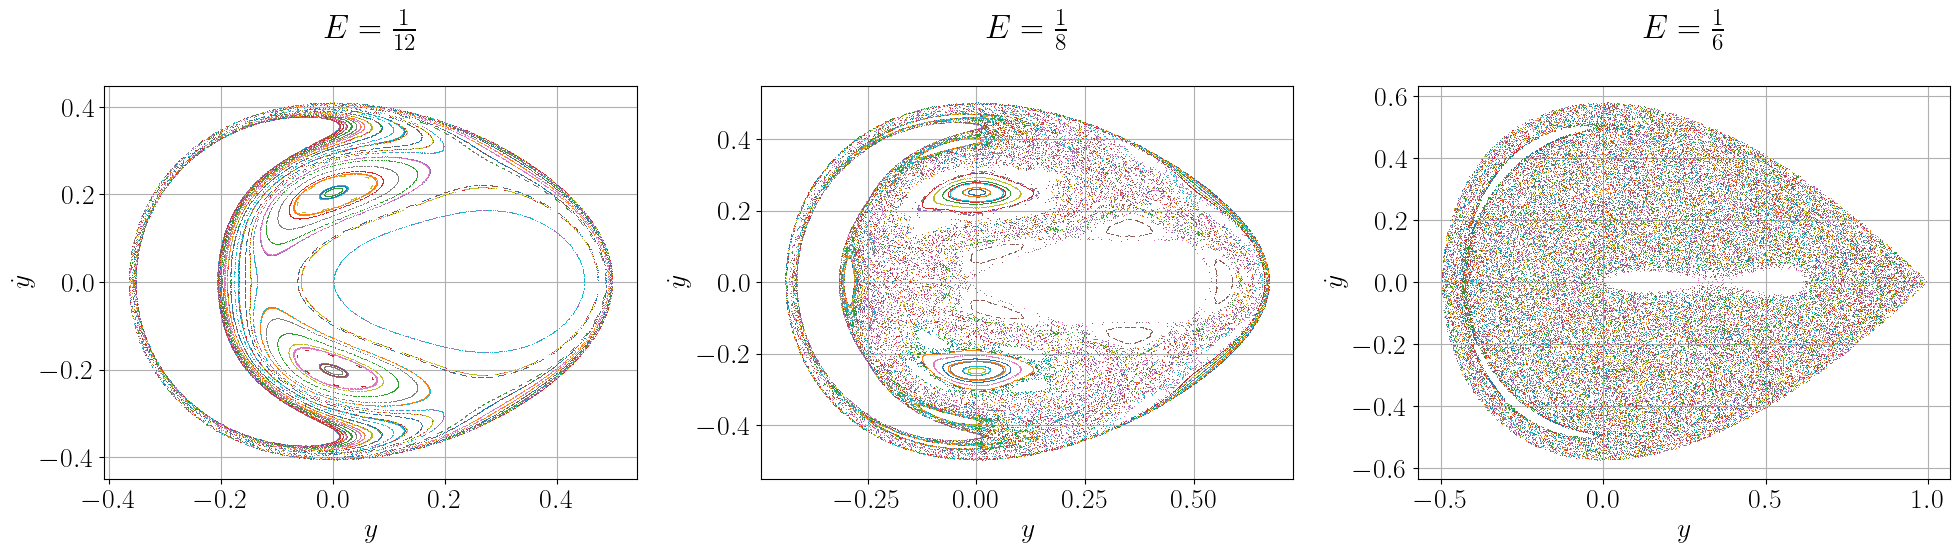

In [36]:
energie = [1/12, 1/8, 1/6]
labels  = [r' $E = \frac{1}{12}$', r' $E = \frac{1}{8}$', r' $E = \frac{1}{6}$']
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
for i, E in enumerate(energie):
    y_vals = np.linspace(-0.6, 0.8, 75)
    dy_pos = []
    for y in y_vals:
        val = 2 * (E - 0.5*y**2 + (1/3)*y**3)
        if val >= 0:
            dy_pos.append(np.sqrt(val)) 

    dy_all = dy_pos + [-dy for dy in dy_pos]

    for py0 in dy_all:
        try:
            y_cross, dy_cross = compute_poincare_section(E=E, y0=0.01, dy0=py0, t_max=2700, dt=0.101, max_crossings=2700)
            ax[i].plot(y_cross, dy_cross, ',', markersize=2)
        except ValueError:
            continue  # skip invalid initial conditions

    ax[i].set_xlabel(r'$y$')
    ax[i].set_ylabel(r'$\dot{y}$')
    ax[i].set_title(labels[i], y=1.1)
    ax[i].grid(True)
    #ax[i].set_xlim(-1, 1)
    #ax[i].set_ylim(-1, 1)
plt.tight_layout()
plt.show()

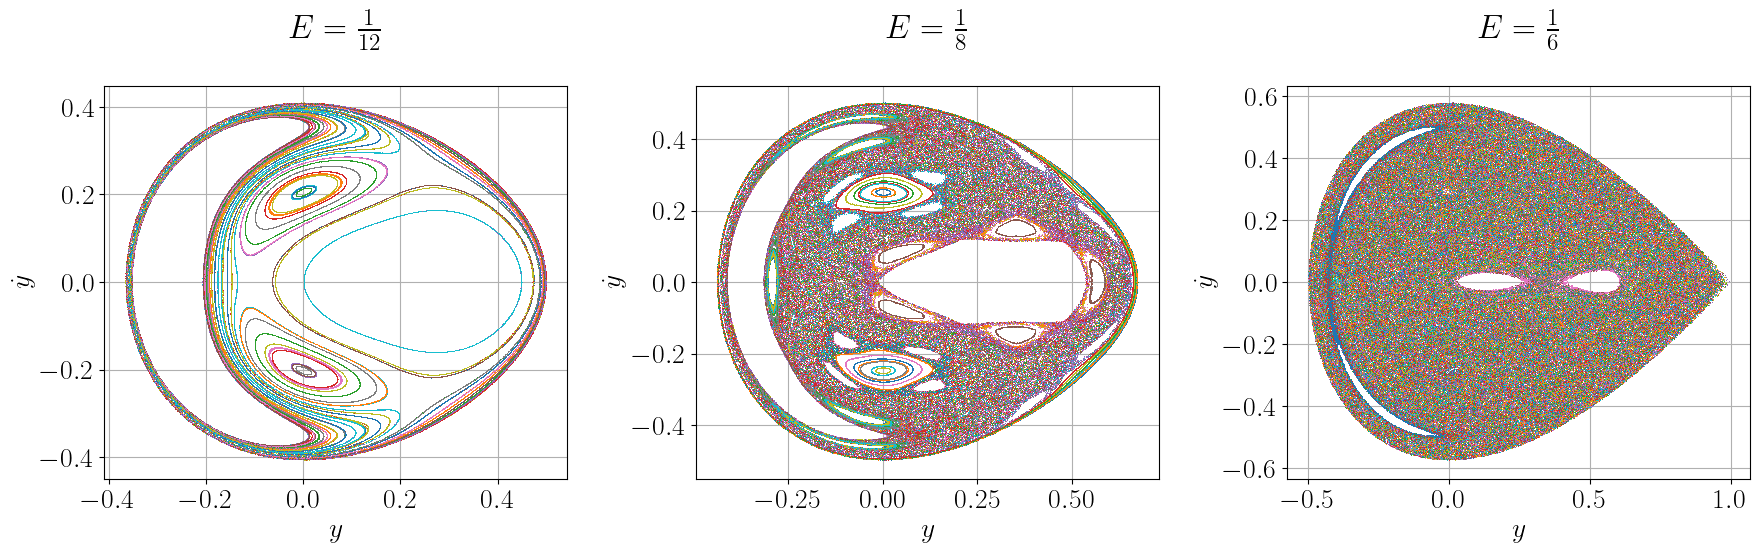

In [16]:
energie = [1/12, 1/8, 1/6]
labels  = [r' $E = \frac{1}{12}$', r' $E = \frac{1}{8}$', r' $E = \frac{1}{6}$']
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
for i, E in enumerate(energie):
    y_vals = np.linspace(-0.6, 0.8, 75)
    dy_pos = []
    for y in y_vals:
        val = 2 * (E - 0.5*y**2 + (1/3)*y**3)
        if val >= 0:
            dy_pos.append(np.sqrt(val)) 

    dy_all = dy_pos + [-dy for dy in dy_pos]

    for py0 in dy_all:
        try:
            y_cross, dy_cross = compute_poincare_section(E=E, y0=0.01, dy0=py0, t_max=32000, dt=0.101, max_crossings=2700)
            ax[i].plot(y_cross, dy_cross, ',', markersize=2)
        except ValueError:
            continue  # skip invalid initial conditions

    ax[i].set_xlabel(r'$y$')
    ax[i].set_ylabel(r'$\dot{y}$')
    ax[i].set_title(labels[i], y=1.1)
    ax[i].grid(True)
    #ax[i].set_xlim(-1, 1)
    #ax[i].set_ylim(-1, 1)
plt.tight_layout()
plt.show()

$\begin{aligned} \frac{dy}{dx}&=\frac{dt}{dx}\frac{dy}{dt}=\frac{1}{dx/dt}\frac{dy}{dt}=\frac{p_y}{p_x} \\ 
\frac{dp_x}{dx}&=\frac{dt}{dx}\frac{dp_x}{dt}=-\frac{1}{p_x}\frac{\partial V}{\partial x} \\
\frac{dp_y}{dx}&=\frac{dt}{dx}\frac{dp_y}{dt}=-\frac{1}{p_x}\frac{\partial V}{\partial y} \end{aligned}$

In [32]:
def get_section(trajectory, tol):
    yl_vals, py_vals = [],[]
    for i in range(1, len(trajectory)):
        if np.abs(trajectory[i, 0]) < tol:
            yl_vals.append(trajectory[i, 2])
            py_vals.append(trajectory[i, 3])
    return np.array([yl_vals]), np.array([py_vals])

def xsection_plot(E, x0, y0, py0, t_span, dt):
    t, traj = trajectory(E, x0, y0, py0, t_span, dt, float)
    return get_section(traj, tol=0.01)

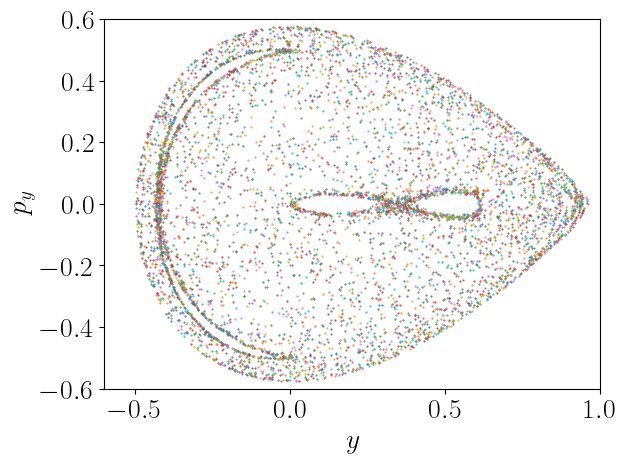

In [33]:
E   = 1/6
x0  = 0.
y0  = 0.01
py0 = 0.02
dt  = 0.101
tsp = (0, 32000)

ypy = xsection_plot( E, x0, y0, py0, tsp, dt)
plt.plot(ypy[0], ypy[1], '.', markersize=1)
plt.xlabel(r'$y$')
plt.ylabel(r'$p_y$')
plt.xlim([-0.6, 1.0])
plt.ylim([-0.6, 0.6])
plt.show()

In [20]:
def xsection(E, x0, y0, py0, t_span, dt):
    t, traj = trajectory(E, x0, y0, py0, t_span, dt, complex)
    y  = traj[:, 2]
    py = traj[:, 3]
    x  = traj[:, 0]
    mask = np.abs(x) < 1e-3
    return y[mask], py[mask]

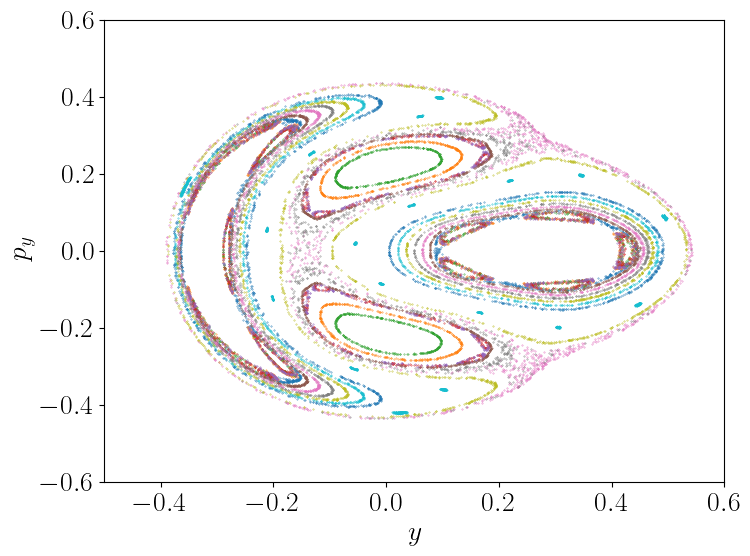

In [10]:
E      = 0.1
x0     = 0.0
y0     = 0.095
pyvals = [0.005, 0.02, 0.03, 0.032, 0.04, 0.05, 0.06, 0.07,0.08, 0.09, 0.1, 
          0.2, 0.25, 0.301, 0.302, 0.303, 0.32018, 0.3202, 0.33, 0.4]
t_span = (0, 50000)
dt     = 0.1

plt.figure(figsize=(8, 6))

for py0 in pyvals:
    y_section, py_section = xsection(E, x0, y0, py0, t_span, dt)
    plt.plot(y_section, py_section, '.', markersize=0.6)
plt.xlabel(r'$y$')
plt.ylabel(r'$p_y$')
plt.xlim(-0.5, 0.6)
plt.ylim(-0.6, 0.6)
plt.show()

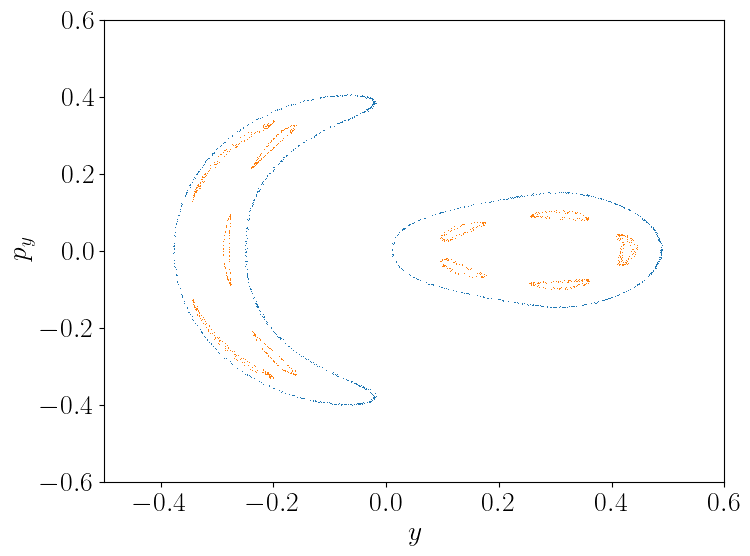

In [11]:
E      = 0.1
x0     = 0.0
y0     = 0.095
pyvals = [0.096, 0.03]
t_span = (0, 50000)
dt     = 0.1

plt.figure(figsize=(8, 6))
for py0 in pyvals:
    y_section, py_section = xsection(E, x0, y0, py0, t_span, dt)
    plt.plot(y_section, py_section, ',', markersize=2)
plt.xlabel(r'$y$')
plt.ylabel(r'$p_y$')
plt.xlim(-0.5, 0.6)
plt.ylim(-0.6, 0.6)
plt.show()

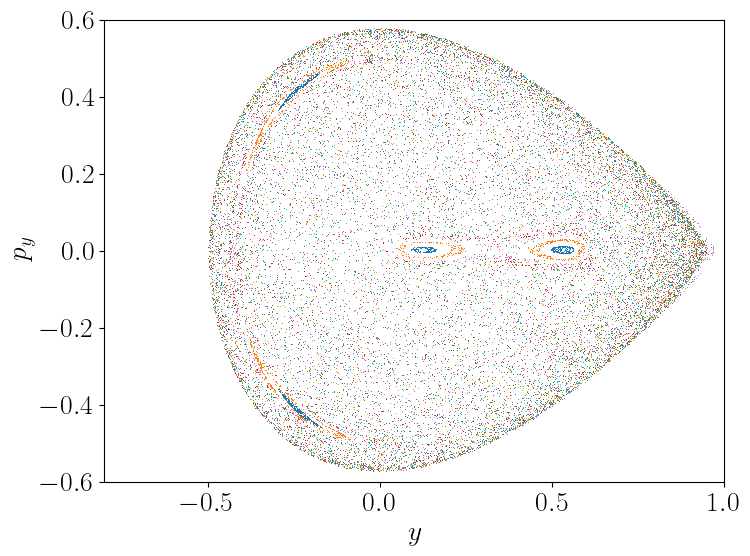

In [12]:
E      = 1/6
x0     = 0.0
y0     = 0.095
pyvals = [0.005, 0.02, 0.03, 0.032, 0.04, 0.05, 0.06, 0.07,0.08, 0.09, 0.1, 
          0.2, 0.25, 0.301, 0.302, 0.303, 0.32018, 0.3202, 0.33, 0.4]
t_span = (0, 50000)
dt     = 0.101

plt.figure(figsize=(8, 6))
for py0 in pyvals:
    y_section, py_section = xsection( E, x0, y0, py0, t_span, dt)
    plt.plot(y_section, py_section, ',', markersize=2)
plt.xlabel(r'$y$')
plt.ylabel(r'$p_y$')
plt.xlim(-0.8, 1.)
plt.ylim(-0.6, 0.6)
plt.show()

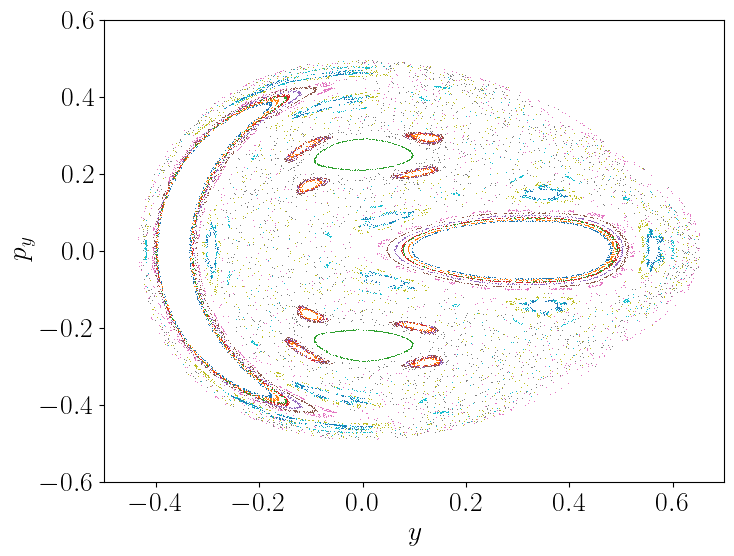

In [12]:
E      = 1/8
x0     = 0.0
y0     = 0.095
pyvals = [0.005, 0.02, 0.03, 0.032, 0.04, 0.05, 0.06, 0.07,0.08, 0.09, 0.1, 
          0.2, 0.25, 0.301, 0.302, 0.303, 0.32018, 0.3202, 0.33, 0.4]
t_span = (0, 50000)
dt     = 0.1

plt.figure(figsize=(8, 6))
for py0 in pyvals:
    y_section, py_section = xsection( E, x0, y0, py0, t_span, dt)
    plt.plot(y_section, py_section, ',', markersize=2)
plt.xlabel(r'$y$')
plt.ylabel(r'$p_y$')
plt.xlim(-0.5, 0.7)
plt.ylim(-0.6, 0.6)
plt.show()

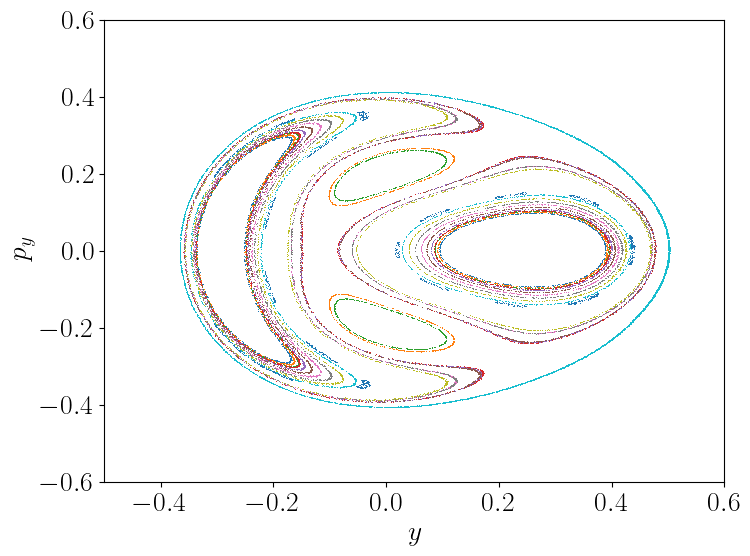

In [13]:
E      = 1/12
x0     = 0.0
y0     = 0.095
pyvals = [0.005, 0.02, 0.03, 0.032, 0.04, 0.05, 0.06, 0.07,0.08, 0.09, 0.1, 
          0.2, 0.25, 0.301, 0.302, 0.303, 0.32018, 0.3202, 0.33, 0.4]
t_span = (0, 50000)
dt     = 0.1

plt.figure(figsize=(8, 6))
for py0 in pyvals:
    y_section, py_section = xsection( E, x0, y0, py0, t_span, dt)
    plt.plot(y_section, py_section, ',', markersize=2)
plt.xlabel(r'$y$')
plt.ylabel(r'$p_y$')
plt.xlim(-0.5, 0.6)
plt.ylim(-0.6, 0.6)
plt.show()

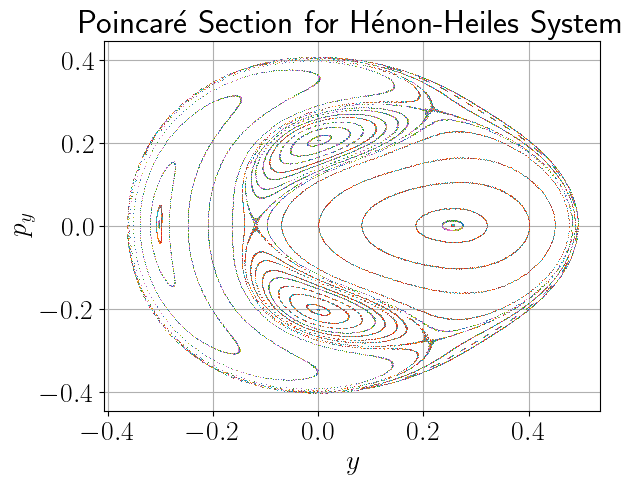

In [15]:
t_span = (0, 5000)
dt     = 1e-2
icv    = [[0, 0.4082401254164024,   0.000000000000000000,  0.0000000000000000   ],
          [0, 0.24008038662195985, -0.15316368171208566,   0.28838672839135326  ],
          [0, 0.24352018790129148,  0.09848498536170303,   0.3135210500944904   ],
          [0, 0.20788819727584018,  0.18687849877360435,   0.3047456328865395   ],
          [0, 0.11124773284074371,  0.24234454959281115,   0.32410152798705066  ],
          [0, 0.09612790055948518,  0.2562151235263743,    0.32091473672760257  ],
          [0, 0.14504873906640348,  0.2433184249171519,    0.3098719090788399   ],
          [0, 0.21466692008332666,  0.21341797098009158,   0.2855018063099425   ],
          [0, 0.2242200636897092,   0.21057030870037158,   0.27976766448196655  ],
          [0, 0.3683386516212832,   0.18778901046261137,   0.011696534024095057 ],
          [0, 0.3451153373835715,   0.23762310035771178,   0.005962392196119196 ],
          [0, 0.33504538978074816,  0.256132905175892,     0.0016617858251372995],
          [0, 0.37097564355830726, -0.03575247849541091,   0.1665183633794433   ],
          [0, 0.37507484064199426, -0.06280527015275122,   0.14788240243852177  ],
          [0, 0.3774580162329546,  -0.08416273725065143,   0.12924644149760023  ],
          [0, 0.3779249463635693,  -0.09982487978911159,   0.11491108692766056  ],
          [0, 0.3818158505457779,  -0.10979169776813169,   0.08910744870176919  ],
          [0, 0.3850735819245613,  -0.11406319118771174,   0.06617088138986574  ],
          [0, 0.3571135001050445,  -0.02151416709681081,   0.1966226079763166   ],
          [0, 0.3537329768656702,  -0.0015805311387706023, 0.20379028526128642  ]]

X_v, Y_v = [], []
y_events, py_events = [], []

for initial_conditions in icv:
    t, sol = RK4(henon_heilies, t_span, dt, initial_conditions, complex)
    x  = sol[:, 0].real
    y  = sol[:, 2].real
    py = sol[:, 3].real

    for i in range(1, len(t)):
        if x[i-1] * x[i] < 0:  # Detect zero-crossing
            y_events.append(y[i])
            py_events.append(py[i])
            plt.plot(y[i], py[i], ',', markersize=1)
plt.xlabel(r'$y$')
plt.ylabel(r'$p_y$')
plt.title('Poincaré Section for Hénon-Heiles System')
plt.grid(True)
plt.show()

# $$\textit{Hénon-Crescent}$$
Hénon-Crescent Hamiltonian $(H)$ system (which may be used as a simple model of the motion of a star inside a galaxy) given by            
                                                                                   
$ \qquad\qquad\begin{align} \mathcal{H} &=T+V=\frac{1}{2} \big( p_x^2+p_y^2+x^2+y^2 \big) + 2(x^4-x^2y)  \\ T &= \frac{1}{2} \big( \dot{x}^2+\dot{y}^2 \big) = \frac{1}{2} \big( p_x^2+p_y^2 \big) \\ V &= \frac{1}{2}( x^2+y^2)+ 2(x^4-x^2y)  \\ \dot{x} &=\frac{dx}{dt}=\frac{\partial H}{\partial p_x}=p_x \\ \ddot{x} & =\dot{p_x}=\frac{dp_x}{dt}=-\frac{\partial H}{\partial x}=-\frac{\partial V}{\partial x}=-x-8x^3+4xy \\ \dot{y} &=\frac{dy}{dt}=\frac{\partial H}{\partial p_y}=p_y \\ \ddot{y} &=\dot{p_y}=\frac{dp_y}{dt}=-\frac{\partial H}{\partial y}=-\frac{\partial V}{\partial y}=-y+2x^2  \end{align}$

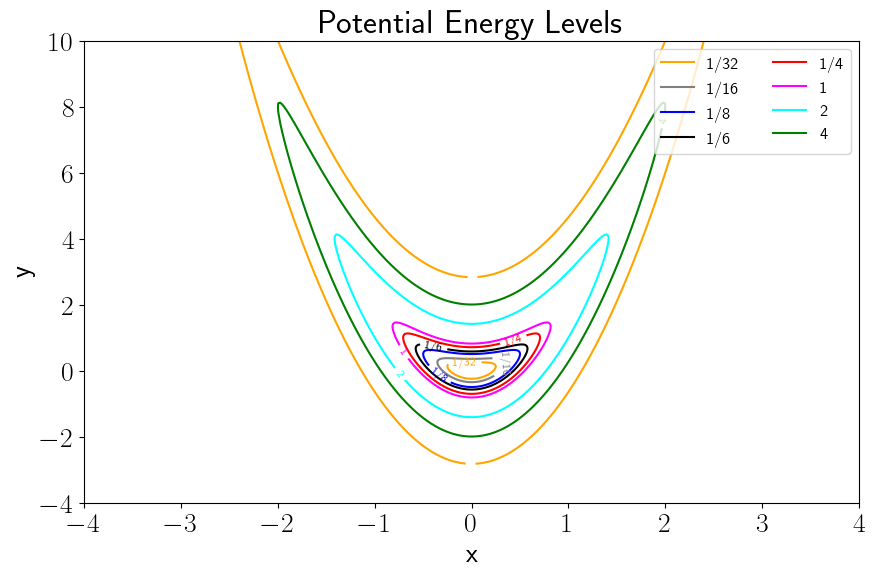

In [30]:
def V(x, y):
    return (1/2)*(x**2 + y**2) + 2*(x**4 - x**2*y)

x = np.linspace(-4,4, 400)
y = np.linspace(-4,8, 400)
X, Y = np.meshgrid(x, y)
Z = V(X, Y)

levels = [ 1/32, 1/16, 1/8, 1/6, 1/4, 1/3, 1, 2, 4]
colors = [ 'orange', 'grey', 'blue', 'black', 'red', 'magenta', 'cyan', 'green']
labels = ['1/32', '1/16', '1/8', '1/6', '1/4', '1', '2', '4']

plt.figure(figsize=(10,6))
contours = plt.contour(X, Y, Z, levels=levels, colors=colors)
plt.clabel(contours, inline=True, fontsize=8, fmt={level: label for level, label in zip(levels, labels)})
plt.xlabel('x')
plt.ylabel('y')
plt.title('Potential Energy Levels')
plt.legend([plt.Line2D([0], [0], color=color) for color in colors], labels, fontsize=12,loc='lower right', ncol=2)
plt.show()

In [5]:
def henon_crescent(t, X0):
    x, px, y, py = X0
    dx_dt  = px
    dpx_dt = 4*x*y - 8*x**3 - x 
    dy_dt  = py
    dpy_dt = 2*x**2 - y 
    return np.array([dx_dt, dpx_dt, dy_dt, dpy_dt])

In [6]:
def trajectory(E, x0, y0, py0, t_span, dt, ftype):
    px0 = (2*E - y0**2 - (y0**2)**2 - py0**2)**0.5
    X0 = [x0, px0, y0, py0]
    t, traj = RK4(henon_crescent, t_span, dt, X0, ftype)
    return t, traj

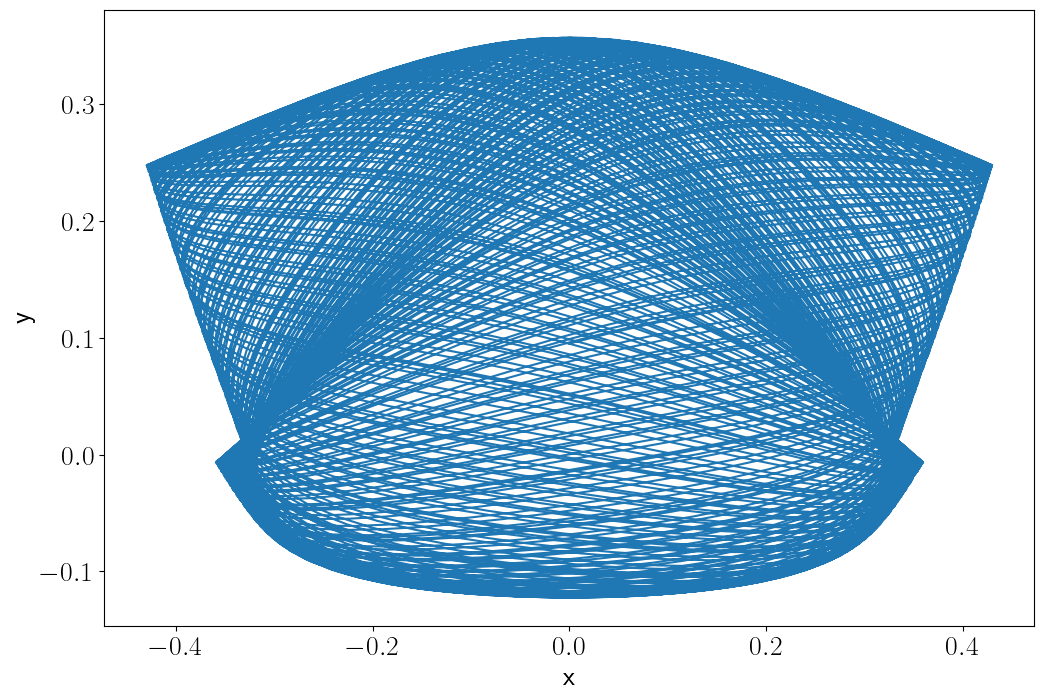

In [7]:
E       = 0.1
x0      = 0.0
y0      = 0.095
py0     = 0.096
t_span  = (0, 800)
dt      = 0.1
t, traj = trajectory(E, x0, y0, py0, t_span, dt, float)
xL, pxL, yL, pyL = traj[:,0], traj[:,1], traj[:,2], traj[:,3]

plt.figure(figsize=(12,8))
plt.plot(xL, yL, '-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

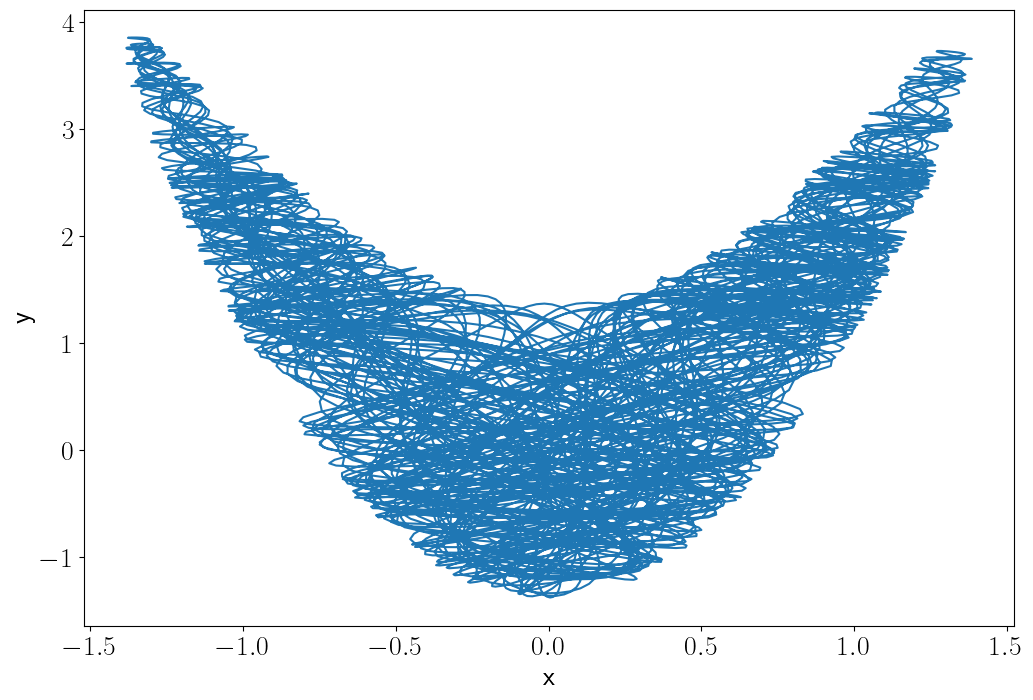

In [8]:
E       = 1
x0      = 0.0
y0      = 0.095
py0     = 0.096
t_span  = (0, 800)
dt      = 0.1
t, traj = trajectory(E, x0, y0, py0, t_span, dt, float)
xL, pxL, yL, pyL = traj[:,0], traj[:,1], traj[:,2], traj[:,3]

plt.figure(figsize=(12,8))
plt.plot(xL, yL, '-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

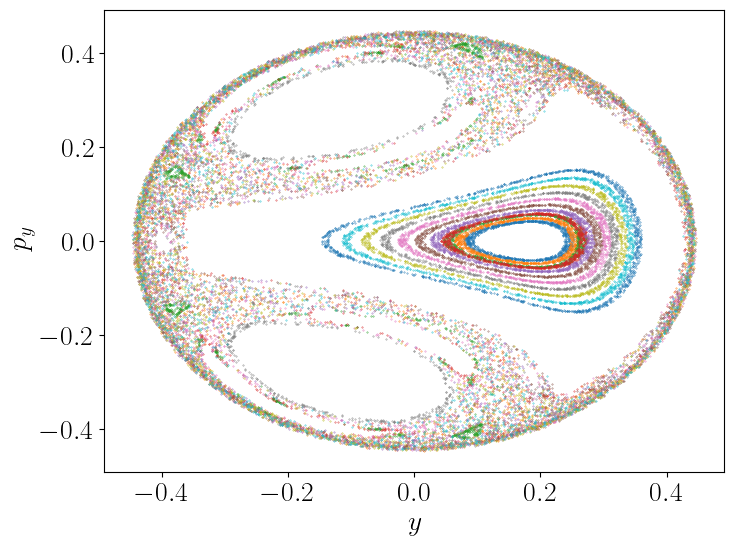

In [9]:
E      = 0.1
x0     = 0.0
y0     = 0.095
pyvals = [0.005, 0.02, 0.03, 0.032, 0.04, 0.05, 0.06, 0.07,0.08, 0.09, 0.1, 
          0.2, 0.25, 0.301, 0.302, 0.303, 0.32018, 0.3202, 0.33, 0.4]
t_span = (0, 50000)
dt     = 0.1

plt.figure(figsize=(8, 6))

for py0 in pyvals:
    y_section, py_section = xsection(E, x0, y0, py0, t_span, dt)
    plt.plot(y_section, py_section, '.', markersize=0.6)
plt.xlabel(r'$y$')
plt.ylabel(r'$p_y$')
#plt.xlim(-0.5, 0.6)
#plt.ylim(-0.6, 0.6)
plt.show()

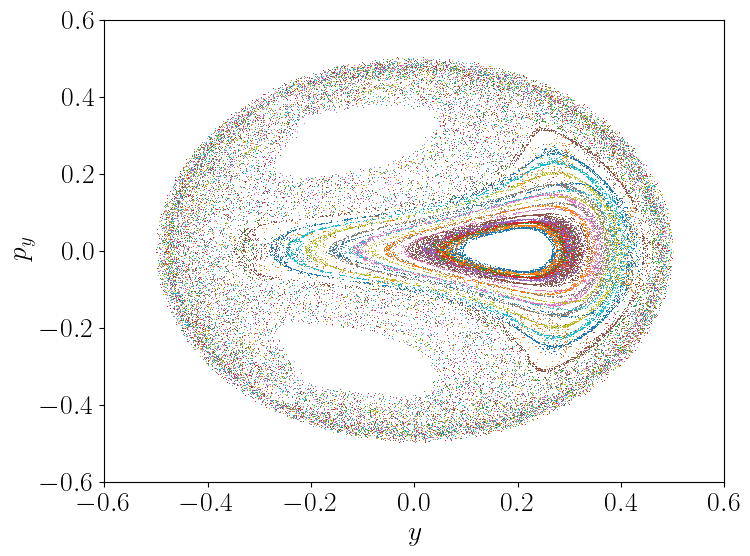

In [10]:
E      = 1/8
x0     = 0.0
y0     = 0.095
pyvals = [0.005, 0.02, 0.03, 0.032, 0.04, 0.05, 0.06, 0.07,0.08, 0.09, 0.1, 
          0.2, 0.25, 0.301, 0.302, 0.303, 0.32018, 0.3202, 0.33, 0.4]
t_span = (0, 100000)
dt     = 0.1

plt.figure(figsize=(8, 6))
for py0 in pyvals:
    y_section, py_section = xsection( E, x0, y0, py0, t_span, dt)
    plt.plot(y_section, py_section, ',', markersize=2)
plt.xlabel(r'$y$')
plt.ylabel(r'$p_y$')
plt.xlim(-0.6, 0.6)
plt.ylim(-0.6, 0.6)
plt.show()

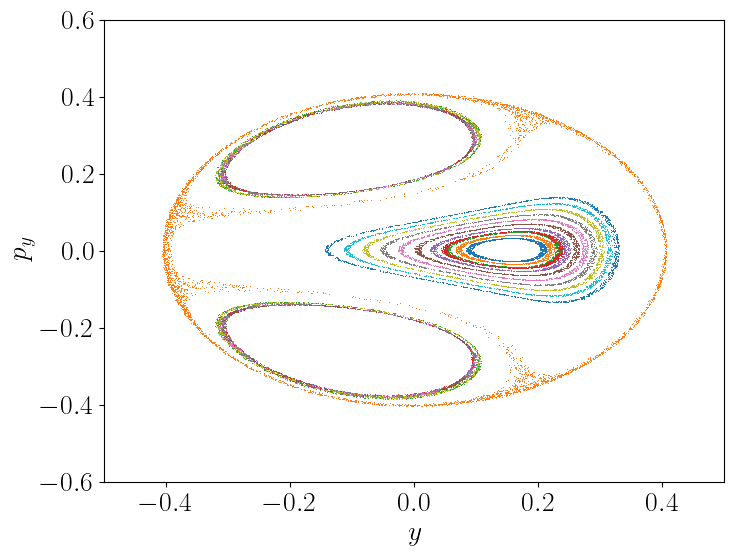

In [49]:
E      = 1/12
x0     = 0.0
y0     = 0.095
pyvals = [0.005, 0.02, 0.03, 0.032, 0.04, 0.05, 0.06, 0.07,0.08, 0.09, 0.1, 
          0.2, 0.25, 0.301, 0.302, 0.303, 0.32018, 0.3202, 0.33, 0.4]
t_span = (0, 50000)
dt     = 0.1

plt.figure(figsize=(8, 6))
for py0 in pyvals:
    y_section, py_section = xsection( E, x0, y0, py0, t_span, dt)
    plt.plot(y_section, py_section, ',', markersize=2)
plt.xlabel(r'$y$')
plt.ylabel(r'$p_y$')
plt.xlim(-0.5, 0.5)
plt.ylim(-0.6, 0.6)
plt.show()

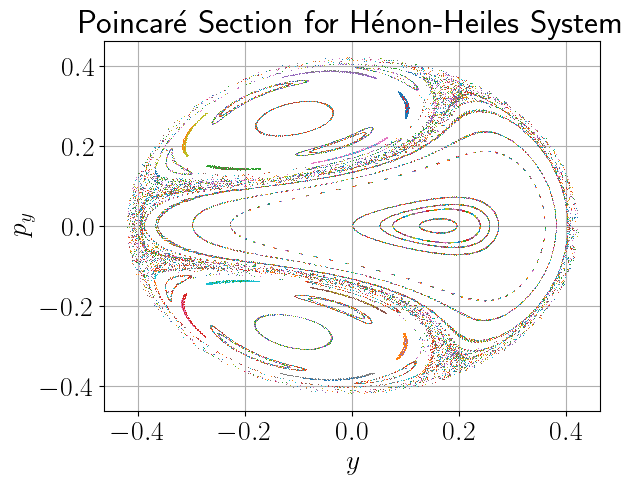

In [39]:
t_span = (0, 5000)
dt     = 1e-2
icv    = [[0, 0.4082401254164024,   0.000000000000000000,  0.0000000000000000   ],
          [0, 0.24008038662195985, -0.15316368171208566,   0.28838672839135326  ],
          [0, 0.24352018790129148,  0.09848498536170303,   0.3135210500944904   ],
          [0, 0.20788819727584018,  0.18687849877360435,   0.3047456328865395   ],
          [0, 0.11124773284074371,  0.24234454959281115,   0.32410152798705066  ],
          [0, 0.09612790055948518,  0.2562151235263743,    0.32091473672760257  ],
          [0, 0.14504873906640348,  0.2433184249171519,    0.3098719090788399   ],
          [0, 0.21466692008332666,  0.21341797098009158,   0.2855018063099425   ],
          [0, 0.2242200636897092,   0.21057030870037158,   0.27976766448196655  ],
          [0, 0.3683386516212832,   0.18778901046261137,   0.011696534024095057 ],
          [0, 0.3451153373835715,   0.23762310035771178,   0.005962392196119196 ],
          [0, 0.33504538978074816,  0.256132905175892,     0.0016617858251372995],
          [0, 0.37097564355830726, -0.03575247849541091,   0.1665183633794433   ],
          [0, 0.37507484064199426, -0.06280527015275122,   0.14788240243852177  ],
          [0, 0.3774580162329546,  -0.08416273725065143,   0.12924644149760023  ],
          [0, 0.3779249463635693,  -0.09982487978911159,   0.11491108692766056  ],
          [0, 0.3818158505457779,  -0.10979169776813169,   0.08910744870176919  ],
          [0, 0.3850735819245613,  -0.11406319118771174,   0.06617088138986574  ],
          [0, 0.3571135001050445,  -0.02151416709681081,   0.1966226079763166   ],
          [0, 0.3537329768656702,  -0.0015805311387706023, 0.20379028526128642  ]]

X_v, Y_v = [], []
y_events, py_events = [], []

for initial_conditions in icv:
    t, sol = RK4(henon_crescent, t_span, dt, initial_conditions, complex)
    x  = sol[:, 0].real
    y  = sol[:, 2].real
    py = sol[:, 3].real

    for i in range(1, len(t)):
        if x[i-1] * x[i] < 0:  # Detect zero-crossing
            y_events.append(y[i])
            py_events.append(py[i])
            plt.plot(y[i], py[i], ',', markersize=1)
plt.xlabel(r'$y$')
plt.ylabel(r'$p_y$')
plt.title('Poincaré Section for Hénon-Heiles System')
plt.grid(True)
plt.show()